In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.applications import VGG16
import matplotlib.pylab as plt

Using TensorFlow backend.


### Liberar Memoria GPU

In [2]:
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

### Preparación del Modelo

In [3]:
batch_size = 10
epochs = 50

In [4]:
from keras.datasets import boston_housing

In [5]:
(xt, yt), (xtest, ytest) = boston_housing.load_data()

# Normalización estándar
mean = xt.mean(axis=0)
xt -= mean

std = xt.std(axis=0)
xt /= std

print(xt.shape[1])

xtest -= mean
xtest /= std

# Otra forma de normalizar, en este caso sacamos el precio máximo
maximo = np.max(yt)
yt = yt / (maximo)
ytest = ytest / maximo

57344/57026 [==============================] - 0s 2us/step
13


### Capas del Modelo

In [6]:
Entradas = Input(shape=(13,))
x = Dense(64, activation='relu')(Entradas)
x = Dense(64, activation='relu')(x)
x = Dense(1, activation='linear')(x)

Instructions for updating:
Colocations handled automatically by placer.


### Creación del Modelo

In [7]:
modelo = Model(inputs=Entradas, outputs=x)
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Compilación y Entrenamiento

In [8]:
Adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Al ser un problema de Regresión Lineal: utilizamos el Error Cuadrático Medio (MSE) como función de pérdidas
modelo.compile(loss=keras.losses.mse, optimizer=Adam, metrics=['mse'])

In [9]:
history = modelo.fit(xt, yt, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xtest,ytest))

Instructions for updating:
Use tf.cast instead.
Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 2/50
404/404 [==============================] - 0s 252us/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3/50
404/404 [==============================] - 0s 255us/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 4/50
404/404 [==============================] - 0s 255us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/50
404/404 [==============================] - 0s 255us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6/50
404/404 [==============================] - 0s 255us/step - loss: 0.0044 - mea

Epoch 49/50
404/404 [==============================] - 0s 252us/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 50/50
404/404 [==============================] - 0s 257us/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0049 - val_mean_squared_error: 0.0049


### Validación 

In [10]:
puntuacion = modelo.evaluate(xtest, ytest, verbose=1)
print(puntuacion)

102/102 [==============================] - 0s 49us/step
[0.004853492383571232, 0.004853492383571232]


### Visualización

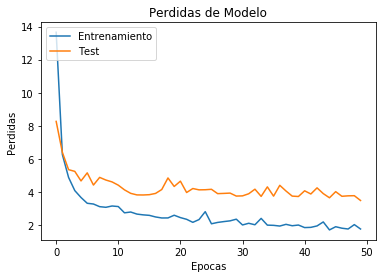

In [11]:
plt.figure(1)
plt.plot(np.sqrt(history.history['loss'])*maximo)
plt.plot(np.sqrt(history.history['val_loss'])*maximo)
plt.title('Perdidas de Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()